In [61]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

### Поговорим немного о распределениях 

**Пример 1**.

У нас есть игральный кубик - 6 граней с числаси от 1 до 6.

Какие вероятности выпадения каждой из возможных граней?

P(1) = 1/6

P(2) = 1/6

P(3) = 1/6

P(4) = 1/6

P(5) = 1/6

P(6) = 1/6

Это - **теоретическое распределение** исходов игрального кубика - в теории, если много раз подбрасывать игральный кубик и посчитать практические вероятности их выпадения, то они должны быть близки по значениям к теоретическому распределению.

Такое распределение называют **равномерным** - вероятности всех исходов равны между собой

Какие еще примеры равномерного распределения можно встретить?

(array([ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.]),
 array([ 1.        ,  1.45454545,  1.90909091,  2.36363636,  2.81818182,
         3.27272727,  3.72727273,  4.18181818,  4.63636364,  5.09090909,
         5.54545455,  6.        ]),
 <a list of 11 Patch objects>)

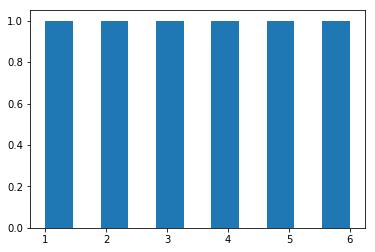

In [62]:
### вот так это выглядит графически - для наглядной демонстрации распределений используют гистограммы

theoretical_variants = np.array([1, 2, 3, 4, 5, 6])
plt.hist(theoretical_variants, bins=11)

Мы упомянули, что чем больше у нас испытаний в выборке, тем больше гистограмма этой выборки будет похожа на теоретическую. Давайте наглядно это продемонстрируем

(array([ 1.,  0.,  2.,  0.,  2.,  0.,  4.,  0.,  5.,  0.,  6.]),
 array([ 1.        ,  1.45454545,  1.90909091,  2.36363636,  2.81818182,
         3.27272727,  3.72727273,  4.18181818,  4.63636364,  5.09090909,
         5.54545455,  6.        ]),
 <a list of 11 Patch objects>)

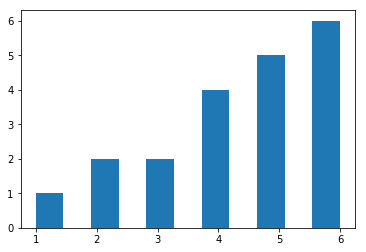

In [63]:
### подбрасываем кубик 20 раз. Как видим - у нас получается лишь общие очертания равномерного распределения
n = 20

results = []
for i in range(n):
    ### функция randint возвращает число из равномерного распределения от low (в нашем случае 1) до (high-1) (в нашем случае 6)
    result = np.random.randint(1, 7)
    results.append(result)
    
plt.hist(results, 11)

(array([ 53.,   0.,  34.,   0.,  39.,   0.,  42.,   0.,  43.,   0.,  39.]),
 array([ 1.        ,  1.45454545,  1.90909091,  2.36363636,  2.81818182,
         3.27272727,  3.72727273,  4.18181818,  4.63636364,  5.09090909,
         5.54545455,  6.        ]),
 <a list of 11 Patch objects>)

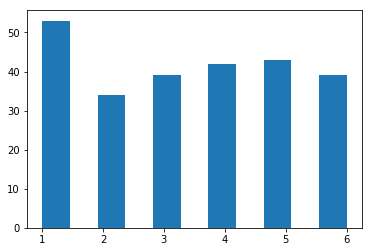

In [64]:
### подбрасываем кубик 500 раз. Уже лучше - распределение становится похожим на 
n = 250

results = []
for i in range(n):
    result = np.random.randint(1, 7)
    results.append(result)
    
plt.hist(results, 11)

(array([ 1631.,     0.,  1668.,     0.,  1665.,     0.,  1708.,     0.,
         1700.,     0.,  1628.]),
 array([ 1.        ,  1.45454545,  1.90909091,  2.36363636,  2.81818182,
         3.27272727,  3.72727273,  4.18181818,  4.63636364,  5.09090909,
         5.54545455,  6.        ]),
 <a list of 11 Patch objects>)

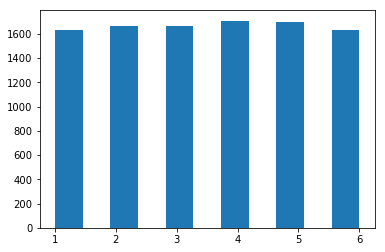

In [65]:
### подбрасываем кубик 10000 раз. Здесь распределение выборки выглядит и вовсе практически идеально равномерным
n = 10000

results = []
for i in range(n):
    result = np.random.randint(1, 7)
    results.append(result)
    
plt.hist(results, 11)

Это наблюдение очень важно - оно отражает **закон больших чисел**. Мы не будем вникать в его математическую составляющую, а отметим основной смысл - чем больше наша выборка из некоторого закона распределения, тем более похоже распределение выборки на теоретическое распределение

В том числе и поэтому в анализе данных очень важно, чтобы было как можно больше данных

К примеру - предположим у нас было бы только 25 наблюдений признака . Как мы видели из гистограммы выше, распределение этой выборки не очень то было похоже на теоретическое равномерное. В такой ситуации нам тяжело сказать, дейтсвительно ли наша выборка была получена из равномерного распределения - вдруг, кубик был очень кривой, и какие-то грани даже теоретически будут выпадать чаще остальных?

А вот когда у нас было 10000 наблюдений, то стало сразу понятно - выборка из равномерного распределения

# Нормальное распределение

Давайте обсудим еще одно распределение, которое является очень важным и с которы часто приходится иметь дело - оно называется **нормальным**

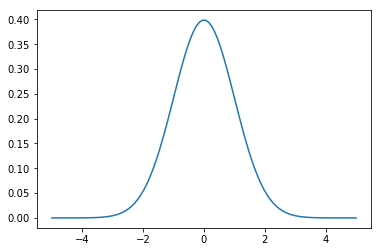

In [66]:
### вид теоретического нормального распределения
mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(-5, 5, 100)
plt.plot(x,sts.norm.pdf(x, mu, sigma))
plt.show()

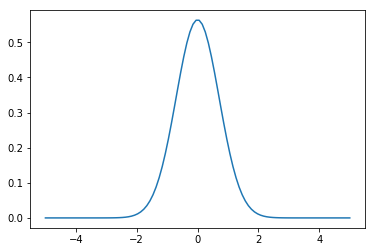

In [67]:
mu = 0
variance = 0.5
sigma = np.sqrt(variance)
x = np.linspace(-5, 5, 100)
plt.plot(x,sts.norm.pdf(x, mu, sigma))
plt.show()

Как видно, для нормального распределения характерен пик, от которого плавно 

Любое нормальное распределение можно описать двумя числами - это его математическим ожидание и стандартным отклонением

Математическое ожидание - пик на графике, в данном случае 0.

Стандартное отклонение - то, насколько широко или узко расползается наш график

Основной смысл стандартного отклонения - то, что в пределах 3 стандартных отклонений от математического ожидания находится 99% наблюдений

(array([   1.,    3.,    5.,   14.,   20.,   50.,   71.,   86.,  116.,
         123.,  130.,  118.,   78.,   75.,   48.,   29.,   17.,    8.,
           6.,    2.]),
 array([ 153.01163325,  155.22334084,  157.43504842,  159.64675601,
         161.85846359,  164.07017118,  166.28187877,  168.49358635,
         170.70529394,  172.91700152,  175.12870911,  177.3404167 ,
         179.55212428,  181.76383187,  183.97553946,  186.18724704,
         188.39895463,  190.61066221,  192.8223698 ,  195.03407739,
         197.24578497]),
 <a list of 20 Patch objects>)

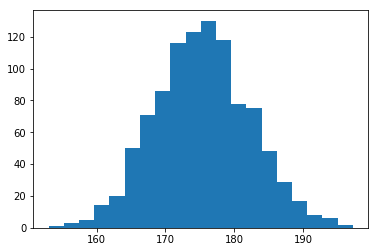

In [68]:
### функция normal генерирует 1000 примеров из нормального распределения с математическим ожиданием 175 и
### и стандартным отклонением 7

massive = np.random.normal(175, 7, 1000)
plt.hist(massive, bins=20)

Попробуем посчитать выборочные математическое ожидание и дисперсию - очень похоже с теоретическими значениями

In [69]:
E_ = np.mean(massive)
STD_ = np.std(massive)

print('Математическое ожидание: ', E_)
print('Стандартное отклонение: ', STD_)

Математическое ожидание:  175.400392774
Стандартное отклонение:  6.89974456479


Найдем значения, которые не попадают в пределы 3 стандартных отклонений

In [70]:
### 
left_value = E_ - 3 * STD_
right_value = E_ + 3 * STD_

for value in massive:
    if (value < left_value) or (value > right_value):
        print (value)

197.245784972
153.01163325


Такие значения называют **выбросами**. Что с ними делать и почему они важны - будем обсуждать в течение курса

А пока - еще gример нормального распределения

(array([   2.,    1.,    0.,    1.,    5.,    2.,    9.,   15.,   15.,
          20.,   33.,   55.,   38.,   75.,   80.,  102.,   99.,  133.,
         174.,  167.,  217.,  218.,  259.,  251.,  254.,  304.,  282.,
         262.,  233.,  242.,  218.,  227.,  164.,  155.,  130.,  119.,
          95.,   82.,   80.,   49.,   38.,   29.,   19.,   14.,   10.,
          14.,    2.,    2.,    2.,    3.]),
 array([  5.04144672,   5.23182771,   5.42220871,   5.6125897 ,
          5.8029707 ,   5.99335169,   6.18373269,   6.37411368,
          6.56449468,   6.75487568,   6.94525667,   7.13563767,
          7.32601866,   7.51639966,   7.70678065,   7.89716165,
          8.08754264,   8.27792364,   8.46830463,   8.65868563,
          8.84906662,   9.03944762,   9.22982861,   9.42020961,
          9.6105906 ,   9.8009716 ,   9.9913526 ,  10.18173359,
         10.37211459,  10.56249558,  10.75287658,  10.94325757,
         11.13363857,  11.32401956,  11.51440056,  11.70478155,
         11.89516255,  1

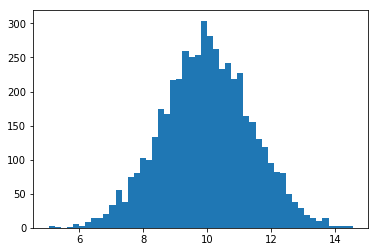

In [71]:
### длина стебеля. Математическое ожидание - 10 см, стандартное отклонение 1.4 см

massive = np.random.normal(10, 1.4, 5000)
plt.hist(massive, bins=50)

Бывают и другие виды типичных распределений вероятности - о них мы будем говорить в ходе курса